In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

#### Loading Data

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
# Getting the 20 % of data
n=20
df=df.head(int(len(df.index)*(n/100)))

In [6]:
df.shape

(8400, 785)

In [7]:
# Checking for null values
df.isnull().sum().sort_values(ascending=False)

pixel783    0
pixel267    0
pixel265    0
pixel264    0
pixel263    0
pixel262    0
pixel261    0
pixel260    0
pixel259    0
pixel258    0
pixel257    0
pixel256    0
pixel255    0
pixel254    0
pixel253    0
pixel252    0
pixel251    0
pixel250    0
pixel249    0
pixel248    0
pixel247    0
pixel246    0
pixel245    0
pixel266    0
pixel268    0
pixel390    0
pixel269    0
pixel290    0
pixel289    0
pixel288    0
           ..
pixel495    0
pixel494    0
pixel493    0
pixel492    0
pixel491    0
pixel512    0
pixel513    0
pixel514    0
pixel526    0
pixel535    0
pixel534    0
pixel533    0
pixel532    0
pixel531    0
pixel530    0
pixel529    0
pixel528    0
pixel527    0
pixel525    0
pixel515    0
pixel524    0
pixel523    0
pixel522    0
pixel521    0
pixel520    0
pixel519    0
pixel518    0
pixel517    0
pixel516    0
label       0
Length: 785, dtype: int64

### Model Building

In [8]:
# splitting into X and y
X = df.drop("label", axis = 1)
y = df.label.values.astype(int)

In [9]:
# scaling the features
X_scaled = scale(X)

In [10]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 4)

In [11]:
# using rbf kernel, C=1, default value of gamma

model = SVC(C = 1, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
# confusion matrix
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[246,   0,   0,   0,   1,   0,   1,   1,   2,   0],
       [  0, 289,   3,   4,   0,   0,   1,   0,   3,   0],
       [  0,   1, 233,   2,   2,   0,   0,   8,   2,   2],
       [  1,   0,   9, 245,   0,   5,   1,   5,   4,   1],
       [  0,   0,   3,   0, 241,   0,   1,   3,   0,   8],
       [  0,   1,   2,   7,   0, 194,   1,   1,   2,   3],
       [  1,   0,   0,   0,   1,   0, 242,   2,   1,   0],
       [  1,   2,   2,   0,   2,   0,   0, 216,   0,   6],
       [  0,   4,   3,   2,   0,   5,   1,   4, 208,   3],
       [  1,   0,   2,   3,   2,   0,   0,  19,   3, 245]], dtype=int64)

### Model Evaluation

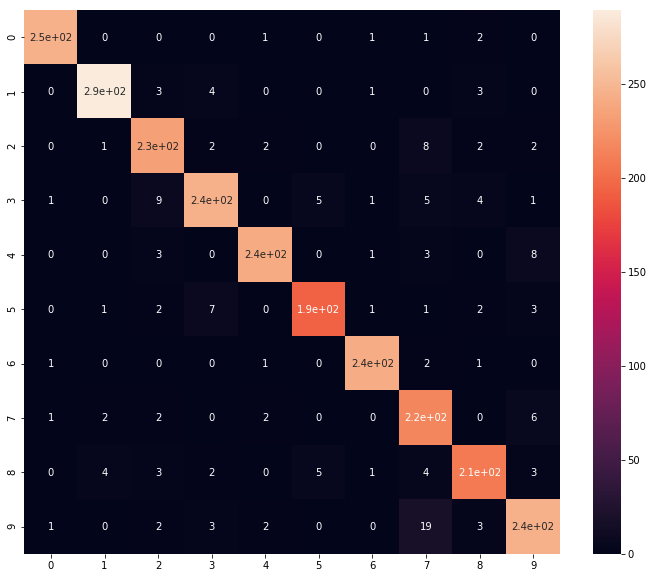

In [13]:
#Visualising the confusion matrix on the heatmap
plt.figure(figsize=(12,10))
corr=confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(corr,annot=True)

In [14]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.9361111111111111


In [31]:
# Calculating precision
TP=0 #Initializing True positives
FP=0 #Initializing False positives
for i in range (corr.shape[0]):
    TP=corr[i][i]
    FP=corr.sum(axis=1)[i]-TP
    print ("Precision for {}, is {ratio} ".format(i,ratio=TP/(TP+FP)))

Precision for 0, is 0.9800796812749004 
Precision for 1, is 0.9633333333333334 
Precision for 2, is 0.932 
Precision for 3, is 0.9040590405904059 
Precision for 4, is 0.94140625 
Precision for 5, is 0.919431279620853 
Precision for 6, is 0.979757085020243 
Precision for 7, is 0.9432314410480349 
Precision for 8, is 0.9043478260869565 
Precision for 9, is 0.8909090909090909 


In [33]:
# Calculating recall
TP=0 #Initializing True positives
FN=0 #Initializing False negatives
for i in range (corr.shape[0]):
    TP=corr[i][i]
    FN=corr.sum(axis=0)[i]-TP
    print ("Recall for {}, is {ratio} ".format(i,ratio=TP/(TP+FN)))

Recall for 0, is 0.984 
Recall for 1, is 0.9730639730639731 
Recall for 2, is 0.9066147859922179 
Recall for 3, is 0.9315589353612167 
Recall for 4, is 0.9678714859437751 
Recall for 5, is 0.9509803921568627 
Recall for 6, is 0.9758064516129032 
Recall for 7, is 0.833976833976834 
Recall for 8, is 0.9244444444444444 
Recall for 9, is 0.914179104477612 


### Hyperparameter Tuning

#### Grid Search to find optimal hyperparameters

In [34]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 32.3min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [35]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,34.255638,0.218825,4.425151,0.280030,1,0.01,"{'C': 1, 'gamma': 0.01}",0.676020,0.721088,0.731293,...,0.715306,0.019931,12,0.999787,1.000000,0.999575,0.999787,0.999787,0.999787,0.000134
1,9.637840,0.192448,2.600058,0.048499,1,0.001,"{'C': 1, 'gamma': 0.001}",0.901361,0.929422,0.925170,...,0.920408,0.009838,4,0.972151,0.970663,0.969600,0.970026,0.970663,0.970621,0.000865
2,14.184259,0.584395,3.486483,0.138358,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.873299,0.894558,0.897109,...,0.888946,0.008411,8,0.909439,0.907526,0.906463,0.910714,0.905612,0.907951,0.001882
3,34.974422,0.873368,4.186377,0.091648,10,0.01,"{'C': 10, 'gamma': 0.01}",0.706633,0.733844,0.749150,...,0.734864,0.015014,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,8.605310,0.600763,2.534111,0.328749,10,0.001,"{'C': 10, 'gamma': 0.001}",0.914966,0.932823,0.931122,...,0.928571,0.007155,3,0.999150,0.998937,0.998724,0.999150,0.999362,0.999065,0.000217
5,6.742865,0.138432,2.241903,0.047244,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.898810,0.921769,0.916667,...,0.914796,0.008181,5,0.962372,0.959396,0.956845,0.958971,0.958121,0.959141,0.001836
6,35.172386,0.599401,4.288660,0.166974,100,0.01,"{'C': 100, 'gamma': 0.01}",0.706633,0.733844,0.749150,...,0.734864,0.015014,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,8.648540,0.262396,2.511188,0.062159,100,0.001,"{'C': 100, 'gamma': 0.001}",0.914116,0.931973,0.931973,...,0.928741,0.007498,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,5.425954,0.316571,1.944195,0.033564,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.898810,0.925170,0.909014,...,0.914286,0.009383,6,0.993622,0.995748,0.993835,0.995536,0.994473,0.994643,0.000865
9,35.177156,0.953863,4.173962,0.081741,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.706633,0.733844,0.749150,...,0.734864,0.015014,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


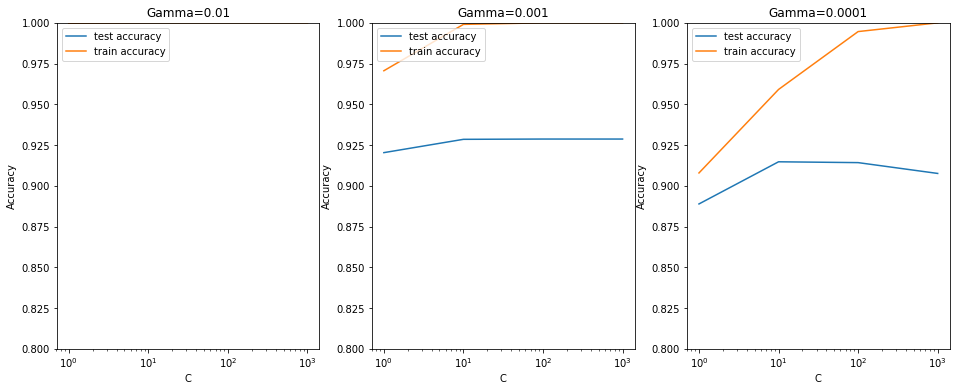

In [36]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [37]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9287414965986395 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


### Building the model using the best parameters

In [49]:
model = SVC(C = 100,gamma=.001, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

accuracy 0.9468253968253968 

[[248   0   0   0   0   0   1   1   1   0]
 [  0 292   2   2   0   0   1   0   2   1]
 [  1   0 236   2   2   0   0   7   1   1]
 [  0   0  10 247   0   4   0   4   6   0]
 [  0   2   3   0 242   0   1   0   0   8]
 [  0   0   1   5   0 196   2   1   3   3]
 [  2   0   2   0   0   0 243   0   0   0]
 [  1   2   2   0   2   0   0 219   0   3]
 [  1   2   4   4   1   4   0   3 208   3]
 [  1   1   2   0   0   0   0  13   3 255]] 



#### The accuracy has improved by 1%

In [50]:
corr=confusion_matrix(y_test, y_pred)
# Calculating precision
TP=0 #Initializing True positives
FP=0 #Initializing False positives
for i in range (corr.shape[0]):
    TP=corr[i][i]
    FP=corr.sum(axis=1)[i]-TP
    print ("Precision for {}, is {ratio} ".format(i,ratio=TP/(TP+FP)))

Precision for 0, is 0.9880478087649402 
Precision for 1, is 0.9733333333333334 
Precision for 2, is 0.944 
Precision for 3, is 0.9114391143911439 
Precision for 4, is 0.9453125 
Precision for 5, is 0.9289099526066351 
Precision for 6, is 0.9838056680161943 
Precision for 7, is 0.9563318777292577 
Precision for 8, is 0.9043478260869565 
Precision for 9, is 0.9272727272727272 


In [51]:
# Calculating recall
TP=0 #Initializing True positives
FN=0 #Initializing False negatives
for i in range (corr.shape[0]):
    TP=corr[i][i]
    FN=corr.sum(axis=0)[i]-TP
    print ("Recall for {}, is {ratio} ".format(i,ratio=TP/(TP+FN)))

Recall for 0, is 0.9763779527559056 
Recall for 1, is 0.9765886287625418 
Recall for 2, is 0.9007633587786259 
Recall for 3, is 0.95 
Recall for 4, is 0.979757085020243 
Recall for 5, is 0.9607843137254902 
Recall for 6, is 0.9798387096774194 
Recall for 7, is 0.8830645161290323 
Recall for 8, is 0.9285714285714286 
Recall for 9, is 0.9306569343065694 


### Conclusion : The Accuracy,Precision and Recall have increased after hyperparameter tuning

### Using the actual train data,test data as provided separately, and predicting the labels of test data

In [77]:
# Preparing the test data
test=pd.read_csv("test.csv")
print(test.shape)
X_test=test
X_test=scale(X_test)#Scaling

(28000, 784)


In [78]:
model = SVC(C = 100,gamma=.001, kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [79]:
# adding the predicted labels as an additional column to the test data
test['label']=pd.Series(y_pred)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [81]:
submission=pd.DataFrame(test.label)
submission.insert(0, 'ImageID', range(1, 1 + len(submission)))
submission.head()

,ImageID,label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [82]:
submission.to_csv('submission.csv',sep=',')

## Kaggle Accuracy Score : 93.8%